In [1]:
import eeg_pwr
import os

In [2]:
direct='C:/Users/Phil/Box Sync/Classes/PSC_290_Final/data'
mont=os.path.join(direct, 'BP64_acti_64rows.sfp')

#event mappings for the test data
evMaps={'1': 1, '2': 2, '3': 3, '48': 48, '77': 77, '88':88, '100': 100, '200' : 200}

In [3]:
%%capture

#initate class, load data, create epochs and bootstrap data
dats=eeg_pwr.boots(fileDir=direct, dataType='cnt', montage=mont, eventMap=None)
dats.load_data()

dats.epoch_subjects(tmin=-.2, tmax=.8, baseline=(None,0.0), 
                    event=['1', '2', '3'], chans=None, store=True)

dats.mean_amplitude(flatten_axes=1, boots=10)


In [4]:
#access mean SE across electrodes for each subject
dats.get_error(across='electrode', type='mean')

array([7.79802017e-06, 8.57721643e-06, 5.45121643e-06, 4.44722202e-06,
       1.05729706e-05, 9.64784434e-06, 8.99181854e-06, 6.40537881e-06,
       5.85281284e-06])

In [5]:
#plot the mean standard error for each electorde
dats.plot_quality_topo(across='subject', stat='mean')

TypeError: plot_topomap() got an unexpected keyword argument 'colorbar'

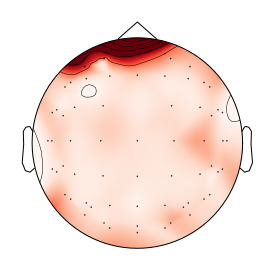

In [9]:
#plot the variance in SE estimates for each electorde
dats.plot_quality_topo(across='subject', stat='std')